In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import re

import folium


In [26]:
park=pd.read_csv('../testData/전국도시공원표준데이터.csv',encoding='euc-kr')

In [ ]:
park.head(2)

In [21]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [ ]:
#park.isnull().sum()
import missingNo as msno
msno.matrix(park)

In [27]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명',   'Unnamed: 19'],inplace=True)

In [29]:
park.tail()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
18132,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,032-770-6205,2019-07-30,3500000,인천광역시 동구
18133,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18134,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18135,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18136,47760-00005,삼지연꽃 테마파크,수변공원,NaN,경상북도 영양군 영양읍 삼지리 200,36.662816,129.129372,380000.0,054-680-6340,2019-09-05,5170000,경상북도 영양군


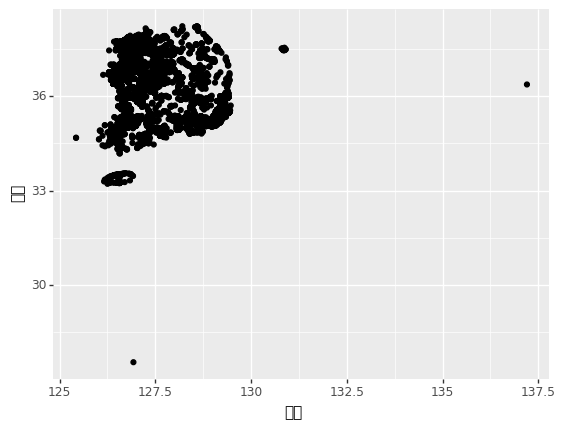

<ggplot: (-9223371921247504116)>

In [33]:
(ggplot(park)
  + aes(x='경도',y='위도')
  + geom_point()
  + theme(text = element_text(family='NanumBarunGothic'))
)

결측지 대체  
아웃라이어 제거 또는 대체  

In [34]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [36]:
park['공원면적비율']=park['공원면적'].apply(lambda x: np.sqrt(x)*0.01)

In [39]:
park['소재지도로명주소'].isnull().sum()

10098

In [50]:
park.loc[(park.소재지도로명주소.isnull()) & (park.소재지지번주소.notnull())].shape

(0, 13)

In [41]:
park.소재지도로명주소.fillna(park.소재지지번주소, inplace=True)

In [51]:
park['시도']=park.소재지도로명주소.str.split(' ',expand=True)[0]

In [53]:
park['구군']=park.소재지도로명주소.str.split(' ',expand=True)[1]

In [47]:
park[['위도','경도']].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [59]:
park_loc_notnull=park.loc[(park.위도>32) & (park.경도 < 132) & (park.시도.notnull())]

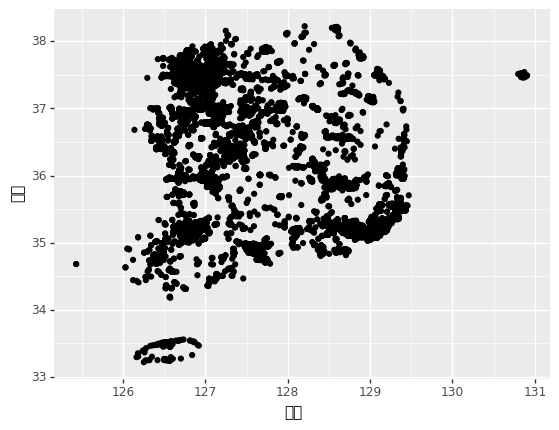

<ggplot: (-9223371921242870000)>

In [60]:
(ggplot(park_loc_notnull)
  + aes(x='경도',y='위도')
  + geom_point()
  + theme(text = element_text(family='NanumBarunGothic'))
)

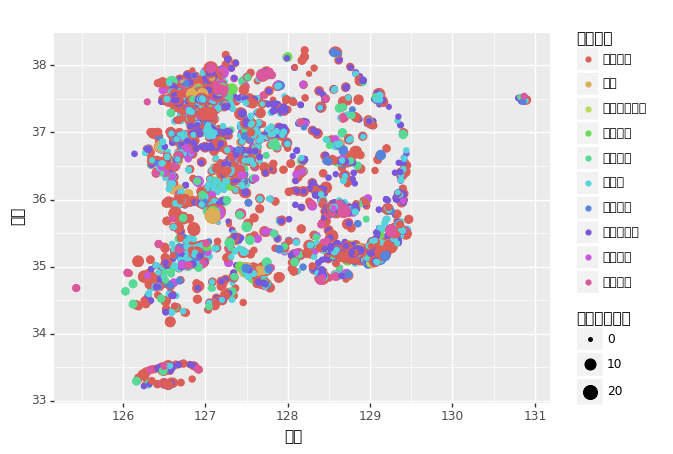

<ggplot: (-9223371921242943952)>

In [62]:
(ggplot(park_loc_notnull)
  + aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
  + geom_point()
  + theme(text = element_text(family='NanumBarunGothic'))
)